# Importar librerías necesarias
Se importan las librerías para manipulación de datos, visualización y regresión lineal.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el dataset
Se carga el archivo CSV con los datos de las casas.

In [42]:
df = pd.read_csv("data/kc_house_data.csv")

# Exploración inicial del dataset
Se muestran las dimensiones y las columnas disponibles para entender la estructura de los datos.

In [43]:
print("Filas y columnas del dataset:", df.shape)
print("Columnas disponibles:", df.columns)

Filas y columnas del dataset: (21613, 21)
Columnas disponibles: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Selección y limpieza de datos
Se seleccionan las columnas relevantes y se eliminan posibles valores nulos.

In [44]:
data = df[['sqft_living', 'price']]
data = data.dropna()

# Separación de variables independiente y dependiente
Se define la variable independiente (superficie) y la dependiente (precio).

In [45]:
X = data[['sqft_living']]   # 2D array (necesario para Scikit-Learn)
y = data['price']           # Serie 1D

# División del dataset en entrenamiento y prueba
Se divide el conjunto de datos en 80% para entrenamiento y 20% para prueba.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
Se crea el modelo y se entrena con los datos de entrenamiento.

In [47]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Evaluación de la precisión del modelo
Se muestra la precisión del modelo usando el método score (R²) sobre los datos de prueba.

In [48]:
precision = modelo.score(X_test, y_test)
print(f"Precisión del modelo: {precision:.4f}")

Precisión del modelo: 0.4941


# Visualización del ajuste del modelo
Se grafica la relación entre la superficie y el precio, junto con la recta de regresión obtenida.

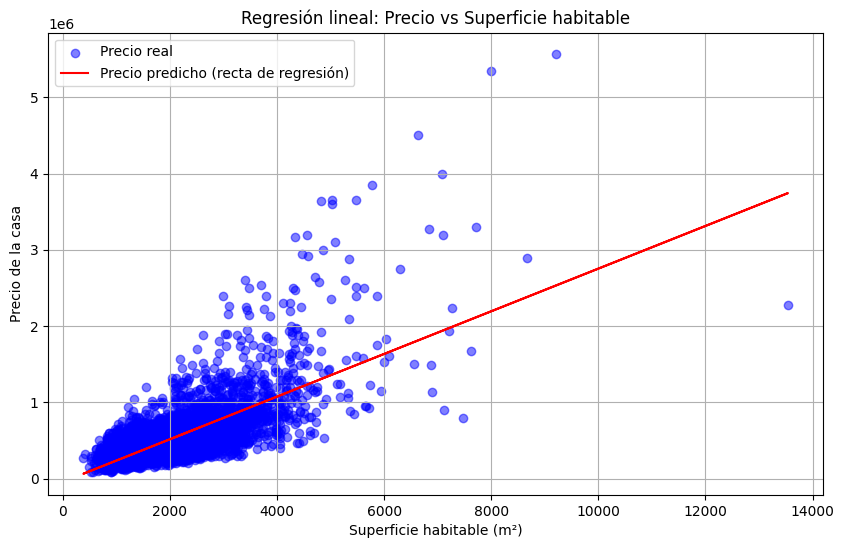

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Precio real')
plt.plot(X_test, modelo.predict(X_test), color='red', label='Precio predicho (recta de regresión)')
plt.title('Regresión lineal: Precio vs Superficie habitable')
plt.xlabel('Superficie habitable (m²)')
plt.ylabel('Precio de la casa')
plt.legend()
plt.grid(True)
plt.show()